In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
%pwd

'C:\\Users\\lg_gram\\Intel\\bigcontest'

In [6]:
foreign=pd.read_csv("eco jeju/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV",encoding='CP949')

In [7]:
#알수없음 데이터 없음
foreign

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [8]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059044 entries, 0 to 6059043
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   visit_pop_cnt  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 323.6+ MB


In [9]:
foreign['visit_pop_cnt']=foreign['visit_pop_cnt'].astype('int')
foreign.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5
4,2018-01-01,1,USA,제주시,50110250,한림읍,3


# Nationality

## 방문 국가 리스트

In [10]:
foreign['nationality'].unique()

array(['CHN', 'ETC', 'HKG', 'JPN', 'USA', 'MYS', 'SGP', 'THA', 'VNM',
       'IDN'], dtype=object)

## 국가별 방문인구 합계

In [11]:
foreign_sum=foreign[['nationality','visit_pop_cnt']].groupby(['nationality']).sum()
foreign_sum.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)

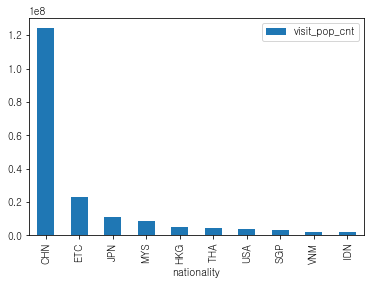

In [12]:
foreign_sum.plot(kind='bar')

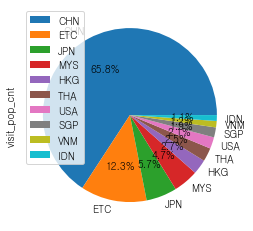

In [13]:
foreign_sum.plot(kind='pie',y='visit_pop_cnt',autopct='%.1f%%')

- 방문 외국인 국적은 중국, 일본, 말레이시아, 홍콩, 태국,미국,싱가폴,베트남,인도네시아, 기타가 있다
- 중국에서 오는 방문인구가 65%이상으로 압도적으로 많다.

## 나라별 읍면동 별 방문인구 합계

In [14]:
foreign_emd=foreign[['nationality','emd_nm','visit_pop_cnt']].groupby(['nationality','emd_nm']).sum()
foreign_emd

visit_pop_cnt
nationality emd_nm               
CHN         건입동           2390983
            구좌읍           1216653
            남원읍           3542203
            노형동           8881738
            대륜동           1166781
...                           ...
VNM         표선면             78650
            한경면             12555
            한림읍             61510
            화북동             13459
            효돈동              1655

[430 rows x 1 columns]

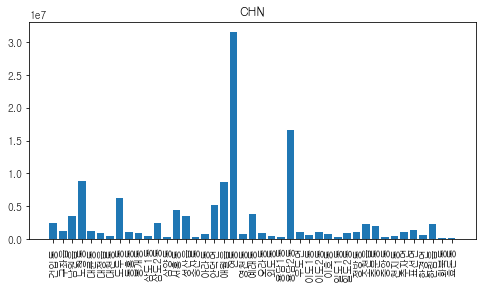

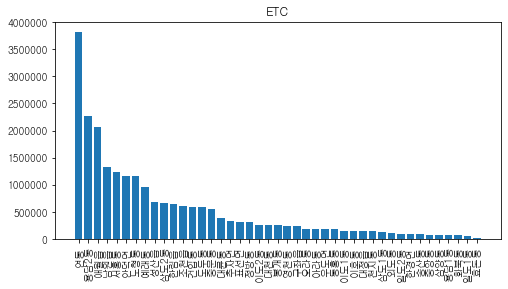

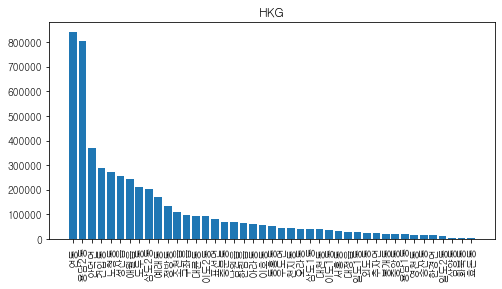

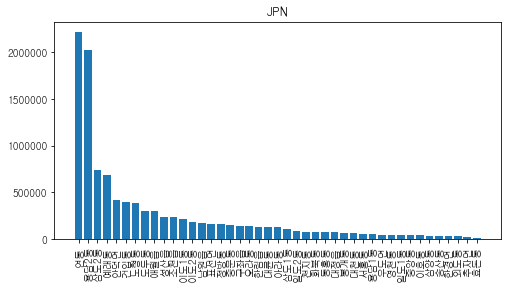

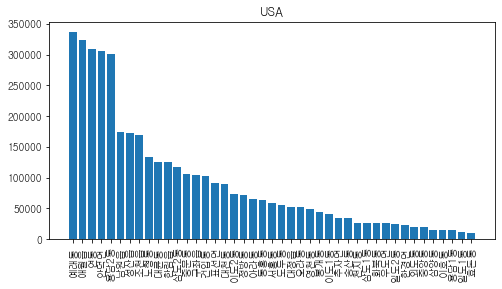

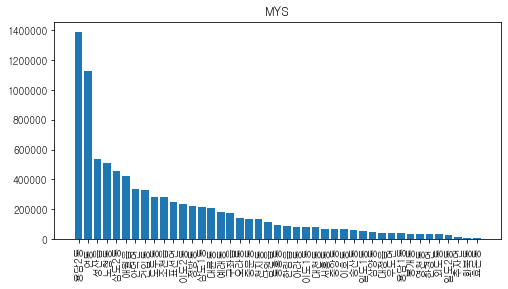

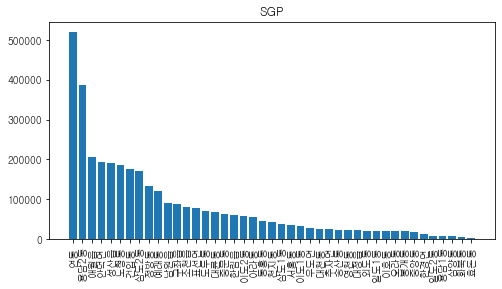

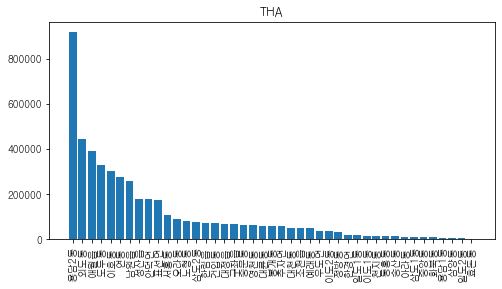

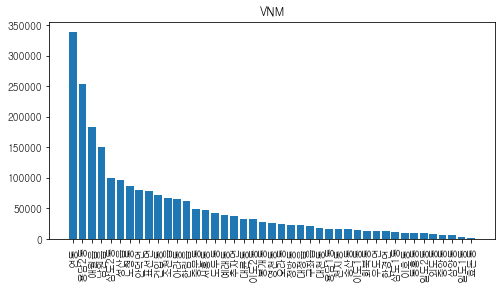

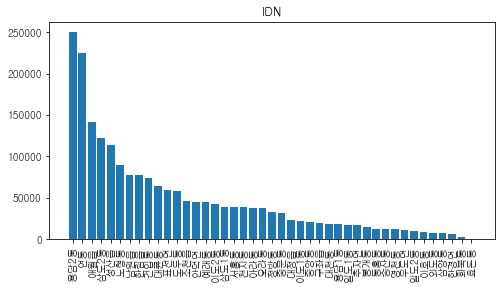

In [15]:
for nation in foreign['nationality'].unique():
    plt.figure(figsize=(8,4))
    foreign_emd_p=foreign_emd.loc[(nation,),]
    foreign_emd.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)
    plt.bar(foreign_emd_p.index,foreign_emd_p['visit_pop_cnt'])
    plt.xticks(rotation=90)
    plt.title(nation)

- 중국 : 연동, 용담2동, 노형동, 애월읍,도두동
- 기타 : 연동, 용담2동 애월읍 남원읍,서홍동
- 홍콩 : 연동, 용담2동, 안덕면, 건입동,노형동
- 일본 : 연동, 용담2동, 삼동2동, 예래동, 안덕면
- 미국 : 예래동, 애월읍, 연동,안덕면, 용담2동
- 말레이시아 : 용담2동, 연동, 성산읍, 노형동, 삼도 2동
- 싱가폴 : 연동, 용담2동, 애월읍, 안덕면, 선산읍
- 태국 :  용담2동, 외도동, 애월읍, 도두동, 이호동
- 베트남 : 연동, 용담2동, 애월읍, 남원읍, 삼동2동

# 읍면동

## 읍면동별 방문인구 합계

In [16]:
foreign_emd=foreign[['emd_nm','visit_pop_cnt']].groupby(['emd_nm']).sum()
foreign_emd.sort_values(by='visit_pop_cnt',ascending=False,inplace=True)

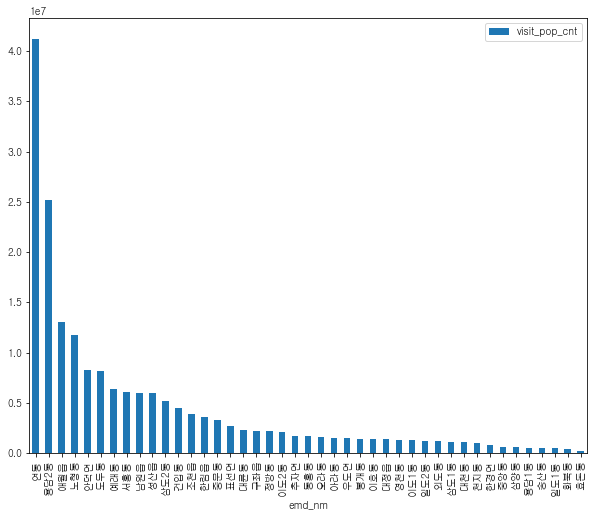

In [17]:
foreign_emd.plot(kind='bar',figsize=(10,8))

- 외국인 방문 인구가 가장 많은 읍면동은 연동, 용담2동,애월읍,노형동,안덕면으로 거주인구나 카드소비와는 조금 다른 양산이다. 
- 가장 적은 읍면동은 용담1동,송산동, 일도1동, 화북동,효돈동이다.

## 읍면동별 나라별 방문인구 합계

In [18]:
foreign_emd=foreign[['emd_nm','visit_pop_cnt','nationality']].groupby(['emd_nm','nationality']).sum()
foreign_emd

visit_pop_cnt
emd_nm nationality               
건입동    CHN                2390983
       ETC                 594842
       HKG                 287203
       IDN                  73745
       JPN                 400839
...                           ...
효돈동    MYS                   8256
       SGP                   3865
       THA                   1872
       USA                  10430
       VNM                   1655

[430 rows x 1 columns]

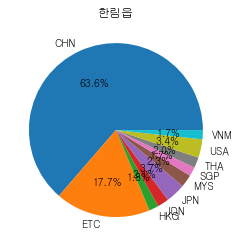

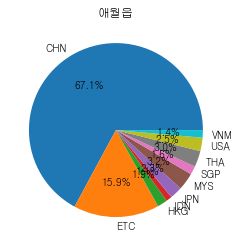

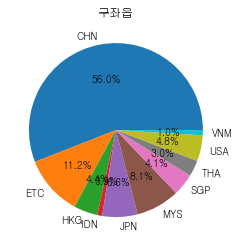

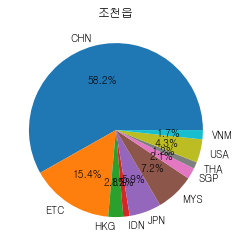

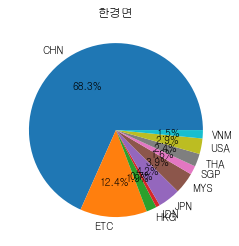

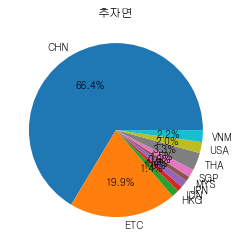

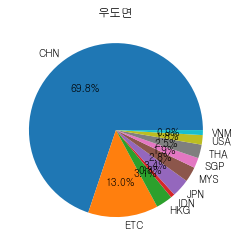

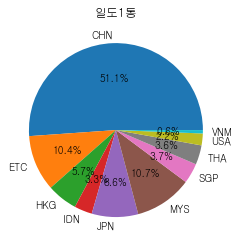

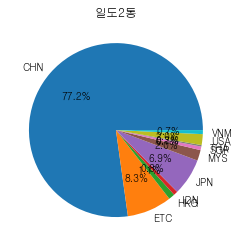

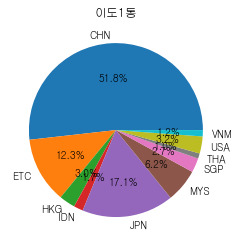

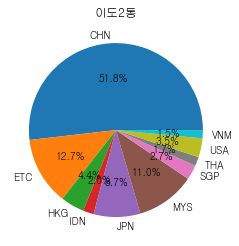

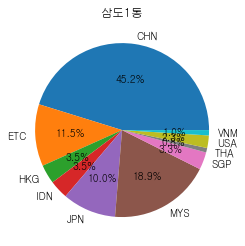

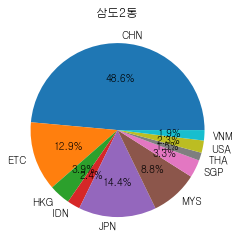

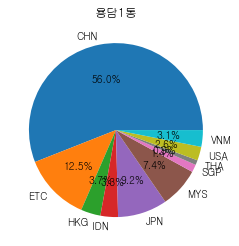

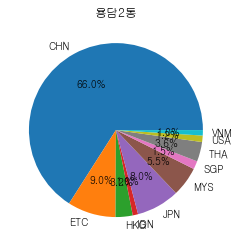

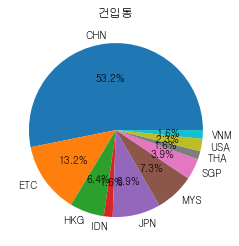

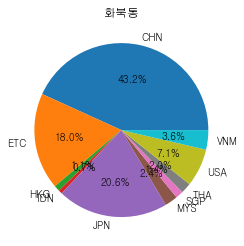

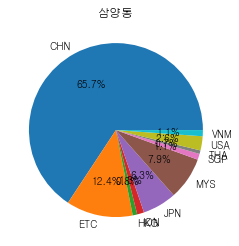

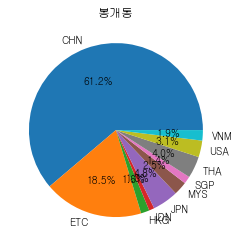

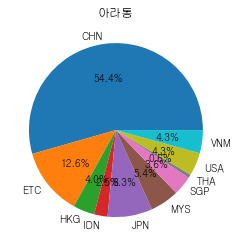

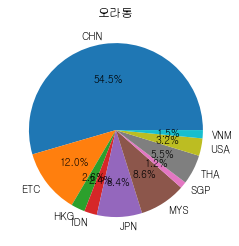

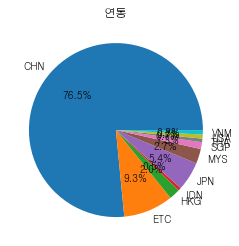

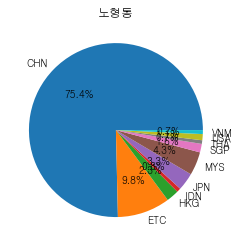

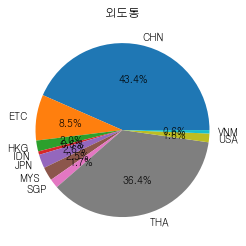

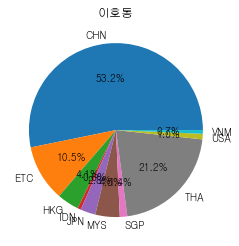

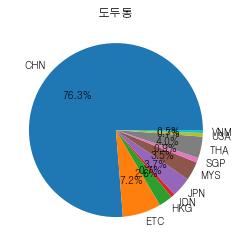

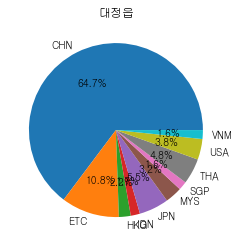

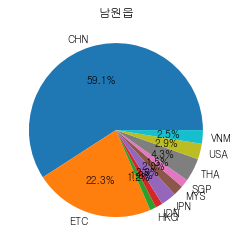

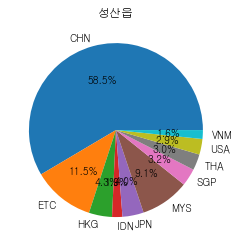

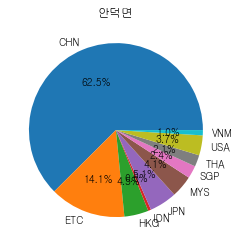

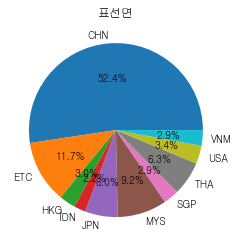

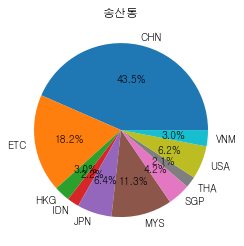

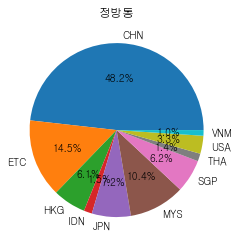

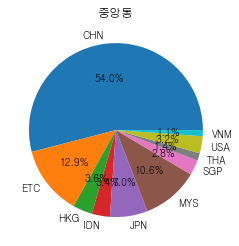

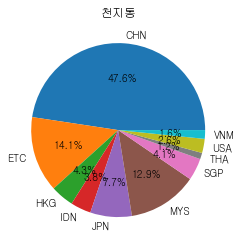

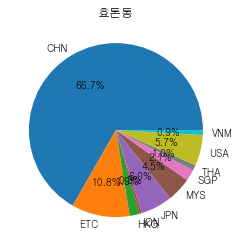

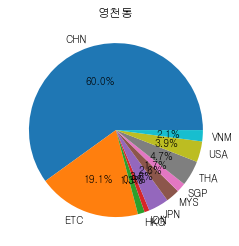

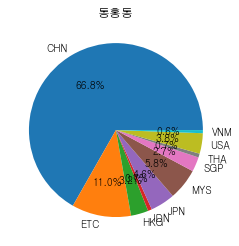

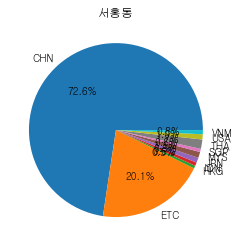

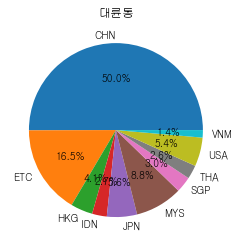

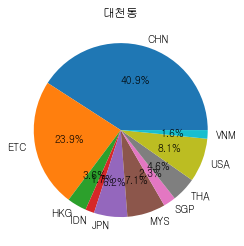

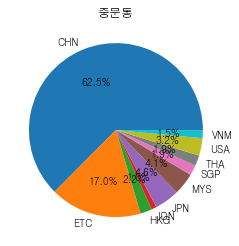

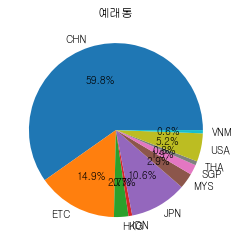

In [19]:
for name in foreign['emd_nm'].unique():
    plt.figure(figsize=(8,4))
    foreign_emd_p=foreign_emd.loc[(name,),]
    plt.pie(foreign_emd_p,labels=foreign_emd_p.index,autopct='%.1f%%')
    plt.title(name)

- 외국인 방문인구가 가장 높았던 애월읍,용담2동,연동,노형동,안덕면은 중국인 방문이 앞도적으로 높다
- 일도 1동(10%),이도 2동(11%),삼동 1동(18.9%),송산동(11%)천지동(12%)은 말레이시아가 전체비율보다 높다
- 이도 1동(17%),이동2동(9.7%),삼동 1동(10%),삼도 2동(14%),화북동 (20%)은 일본이 전체비율보다 높다
- 외도동(36%),이호동(21%) 태국이 전체비율보다 높다
- 대륜동(5%),대천동(8%)은 미국이 전체비율보다 높다

## 읍면동별 연도별 평균

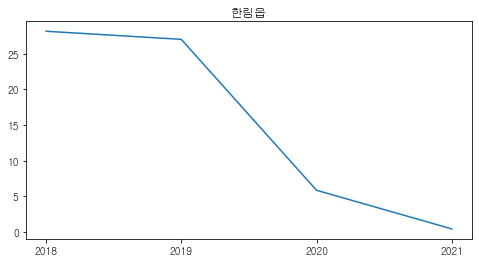

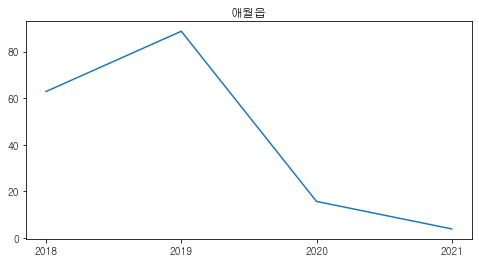

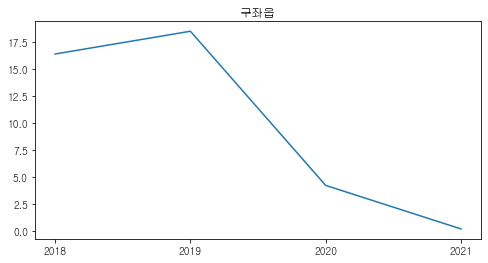

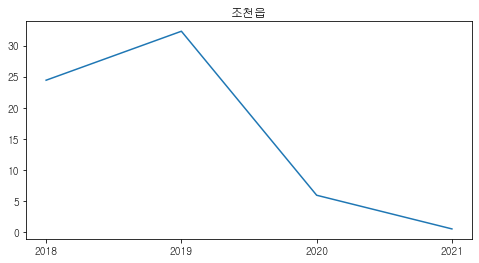

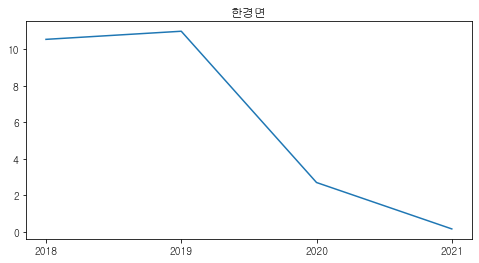

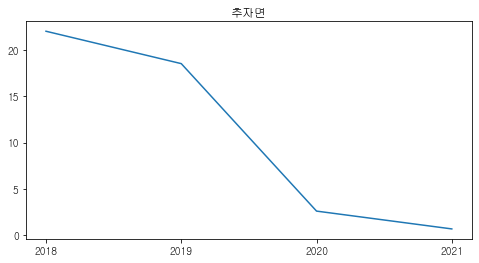

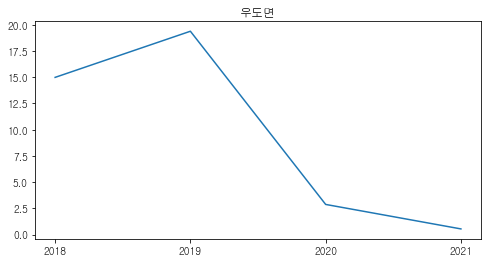

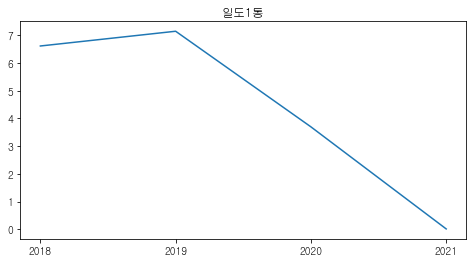

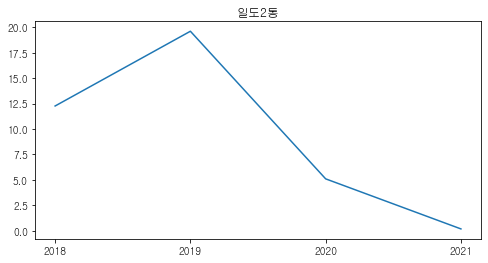

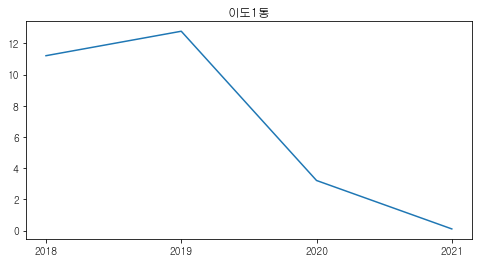

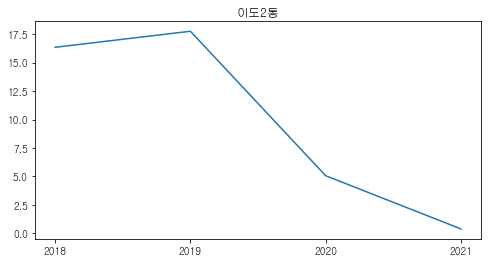

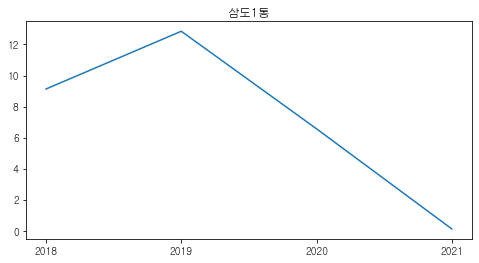

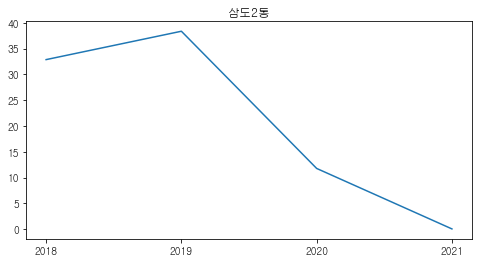

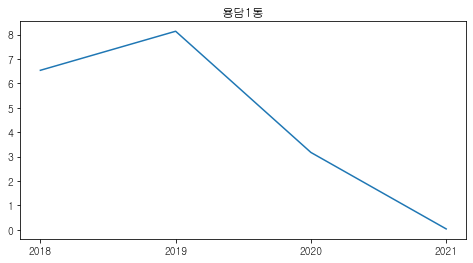

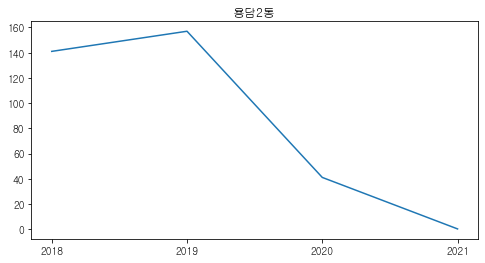

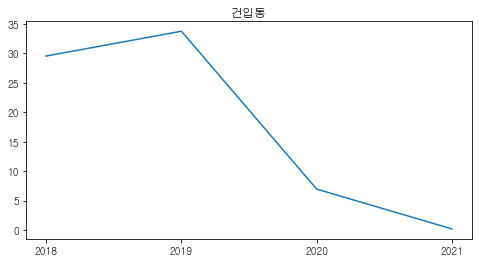

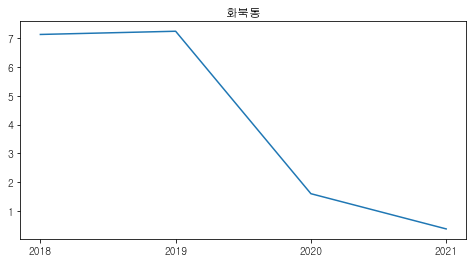

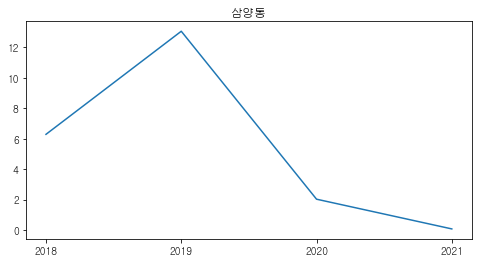

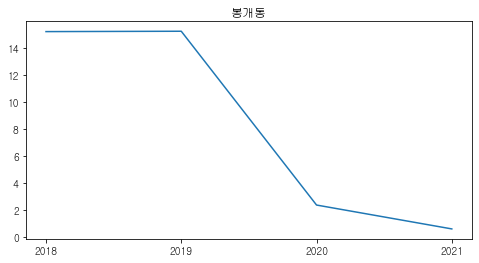

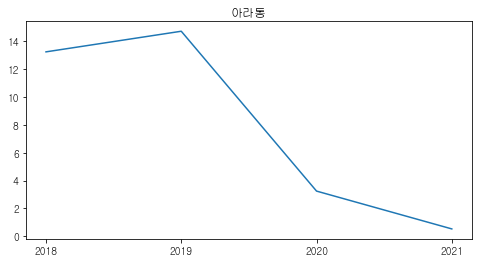

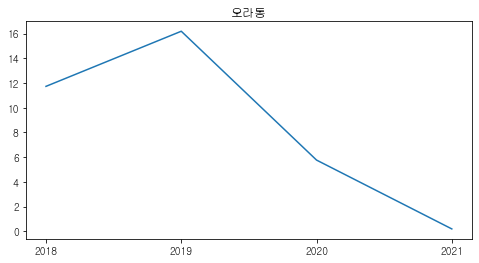

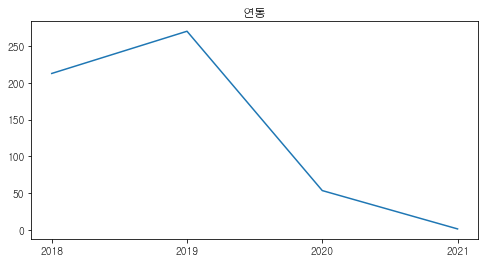

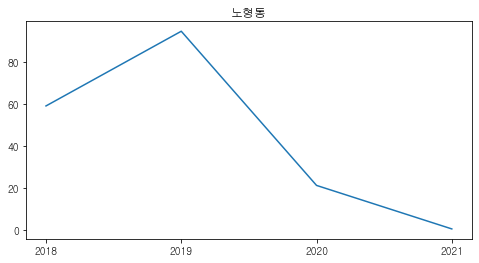

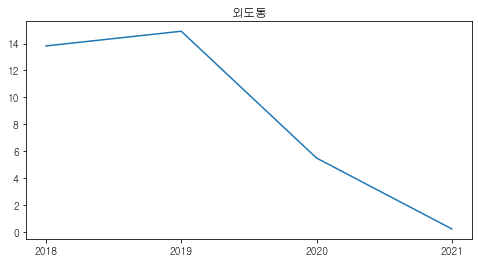

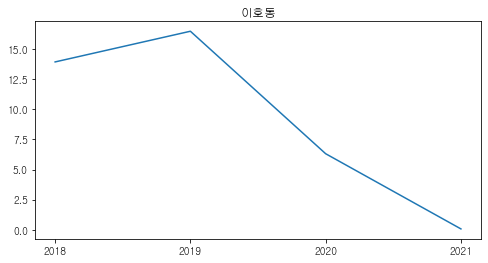

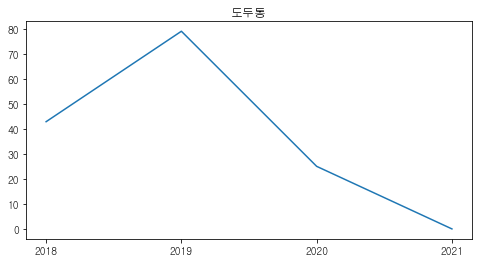

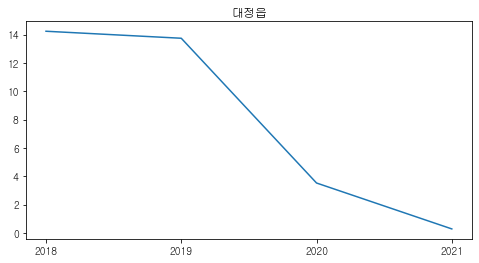

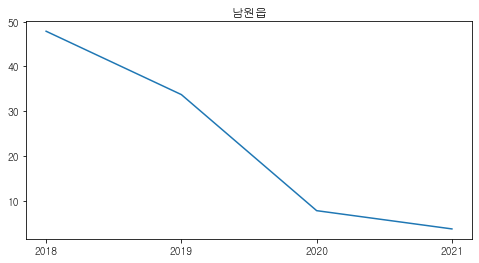

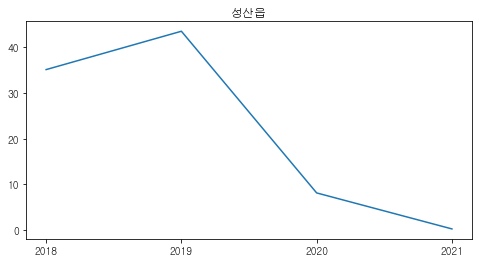

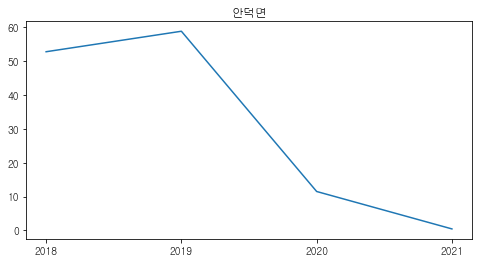

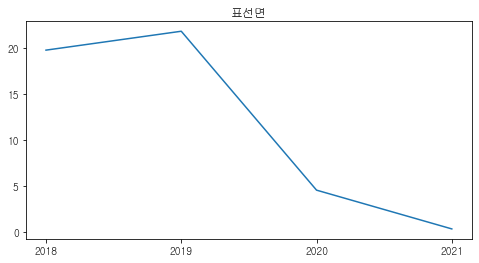

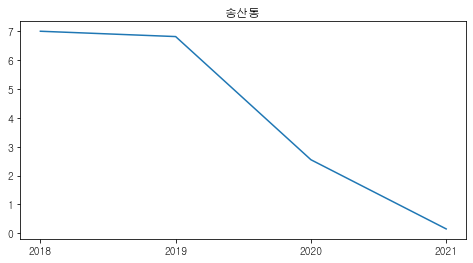

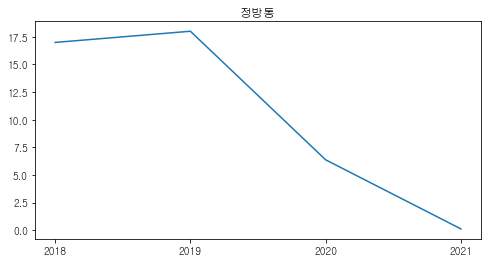

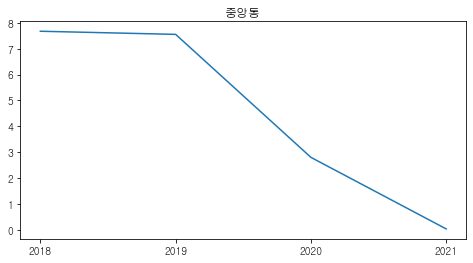

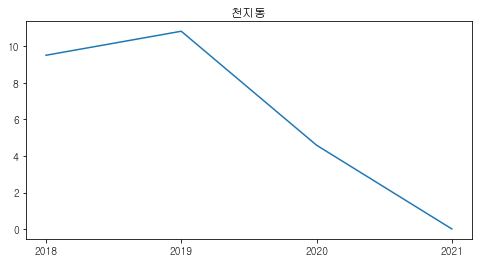

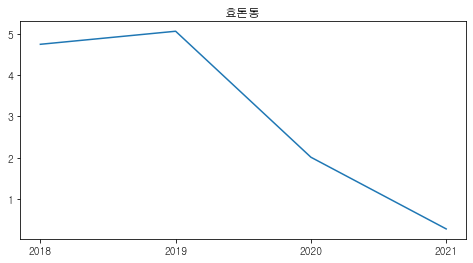

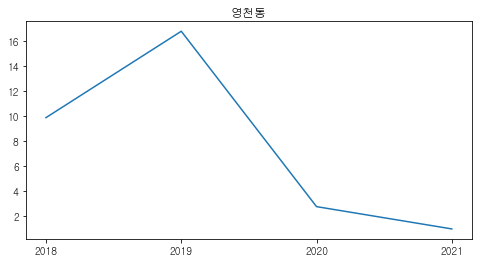

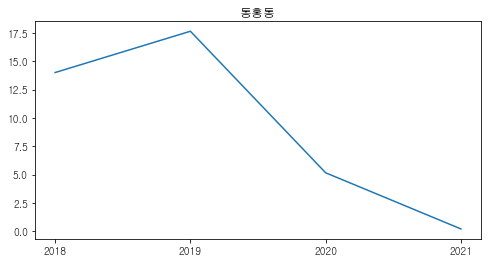

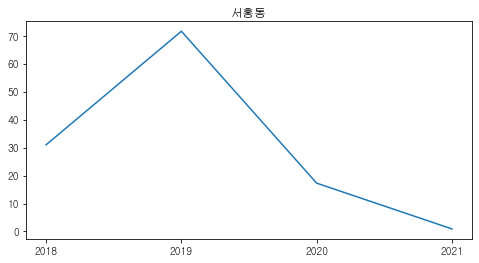

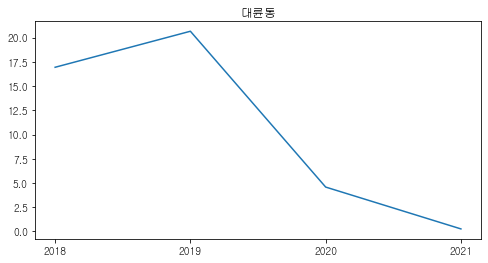

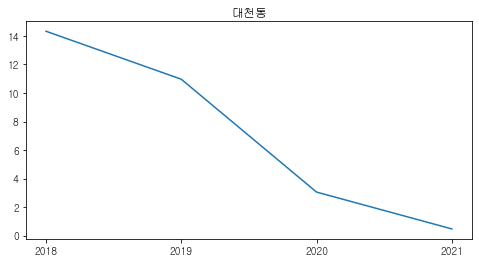

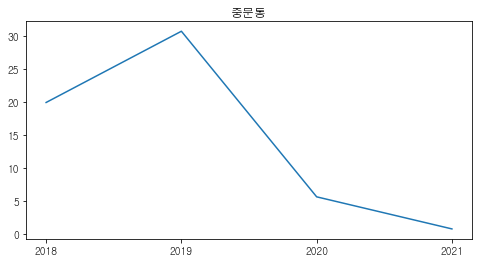

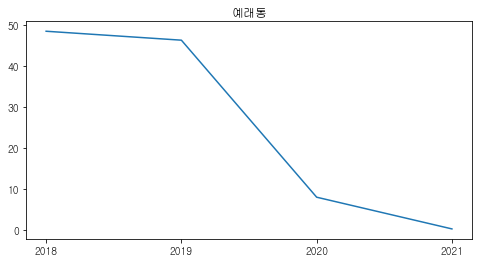

In [74]:
area_year=foreign[['year','emd_nm','visit_pop_cnt']].groupby(['year','emd_nm']).mean()
area_year
for name in foreign.emd_nm.unique():
    plt.figure(figsize=(8,4))
    area_p=area_year.xs(name,level='emd_nm')
    plt.plot(area_p.index,area_p['visit_pop_cnt'])
    plt.title(name)

# 추이

## 연도별 추이

In [20]:
foreign['year']=foreign['base_date'].apply(lambda x : x.split('-')[0])
foreign['month']=foreign['base_date'].apply(lambda x : x.split('-')[1])
foreign.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66,2018,01
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21,2018,01
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3,2018,01
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5,2018,01
4,2018-01-01,1,USA,제주시,50110250,한림읍,3,2018,01


In [21]:
year=foreign[['year','visit_pop_cnt']].groupby(['year']).sum()
year

,visit_pop_cnt
year,
2018,74410081
2019,102329480
2020,11462164
2021,438142


- 2019년에서 2020년사이의 감소 추이가 뚜렷하고 2021년은 데이터가 아직 부족

##  연도별 나라별 방문 비율

In [22]:
#2021년의 데이터가 적기때문에 비율로 확인
year_df=foreign[['year','visit_pop_cnt','nationality']].groupby(['year','nationality']).sum()

In [23]:
year_df

visit_pop_cnt
year nationality               
2018 CHN               45432884
     ETC                9166501
     HKG                2724425
     IDN                1054514
     JPN                5187256
     MYS                3717248
     SGP                1611323
     THA                2689803
     USA                1744319
     VNM                1081808
2019 CHN               71219430
     ETC               11928973
     HKG                2328069
     IDN                 853393
     JPN                5197277
     MYS                4384131
     SGP                1771212
     THA                1769628
     USA                1842565
     VNM                1034802
2020 CHN                7389999
     ETC                1879854
     HKG                 121041
     IDN                 136968
     JPN                 402181
     MYS                 678208
     SGP                 119599
     THA                 284233
     USA                 321060
     VNM                 129021
2021 CHN                  69873
     ETC                 219851
     HKG                      0
     IDN                    836
     JPN                  12846
     MYS                   1078
     SGP                      0
     THA                      0
     USA                 133397
     VNM                    261

In [24]:
year_df=foreign[['year','visit_pop_cnt','nationality']].groupby(['nationality','year']).sum()

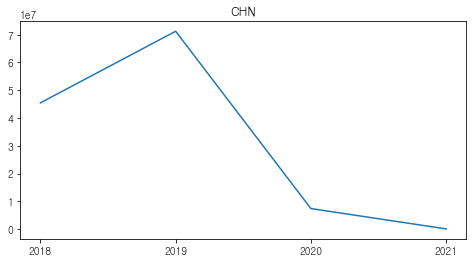

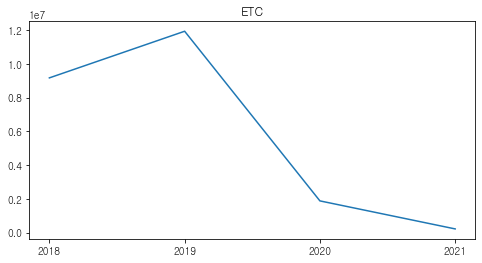

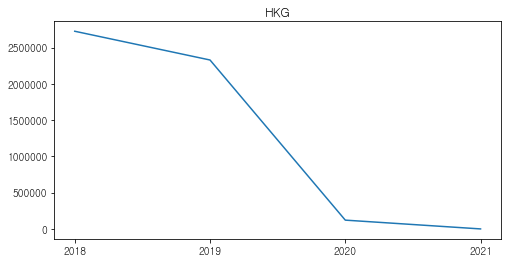

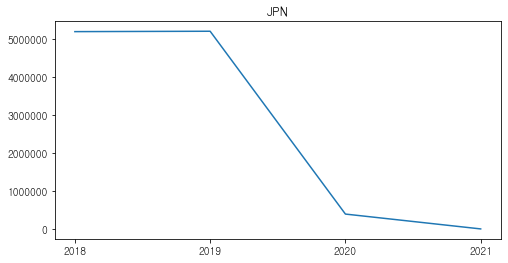

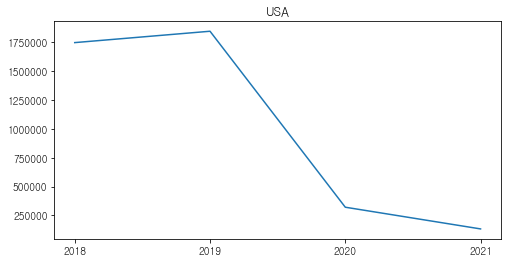

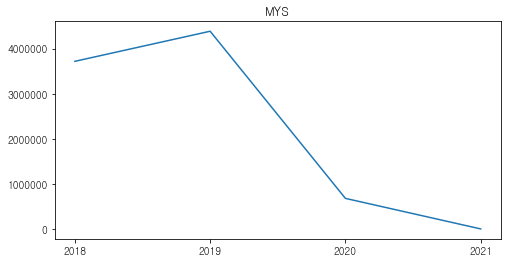

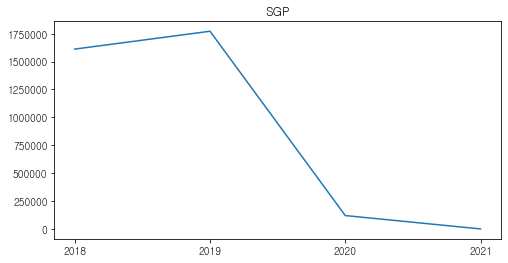

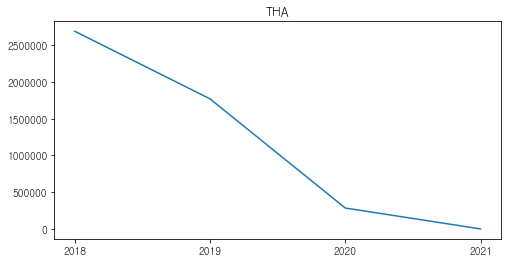

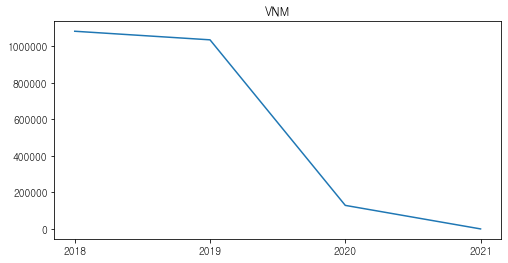

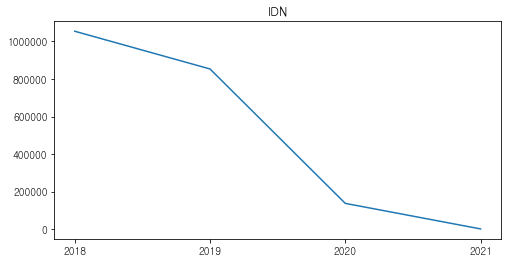

In [25]:
for nation in foreign['nationality'].unique():
    plt.figure(figsize=(8,4))
    year_nation=year_df.loc[(nation,),]
    plt.plot(year_nation.index,year_nation['visit_pop_cnt'])
    plt.title(nation)

In [26]:
#2021년의 데이터가 적기때문에 비율로 확인
year_df=foreign[['year','visit_pop_cnt','nationality']].groupby(['year','nationality']).sum()

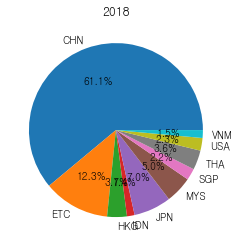

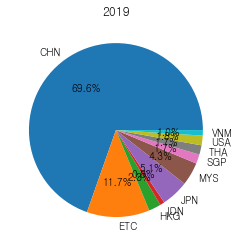

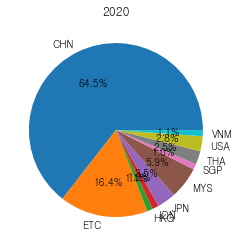

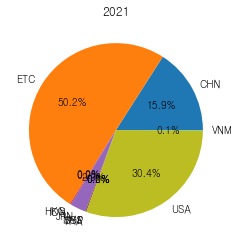

In [27]:
for year in foreign['year'].unique():
    plt.figure(figsize=(8,4))
    year_nation=year_df.loc[(year,),]
    plt.pie(year_nation,labels=year_nation.index,autopct='%.1f%%')
    plt.title(year)

## 월별 방문인구 추이

In [28]:
month=foreign[['month','visit_pop_cnt']].groupby(['month']).sum()
month

,visit_pop_cnt
month,
01,17913016
02,12832140
03,13637194
04,13967473
05,14342594
06,14888495
07,15907703
08,19138879
09,15461974


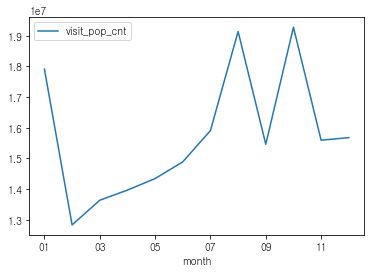

In [29]:
month.plot(kind='line')

- 가장 방문이 많은 달은 8월과 10월로 1920만명, 가장 방문이 적은 달은 2월로 1280만명 약 640만명 차이

## 월별 나라별 추이

In [34]:
month=foreign[['month','visit_pop_cnt','nationality']].groupby(['nationality','month']).mean()
month

visit_pop_cnt
nationality month               
CHN         01        108.116049
            02         85.032548
            03         77.478683
            04         76.333567
            05         79.429135
...                          ...
VNM         08         12.087354
            09          9.522625
            10         11.569193
            11         12.000708
            12         10.027515

[120 rows x 1 columns]

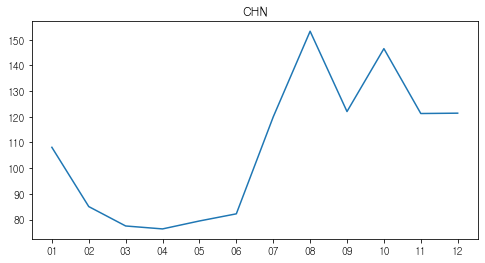

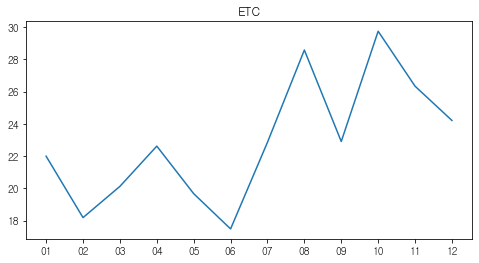

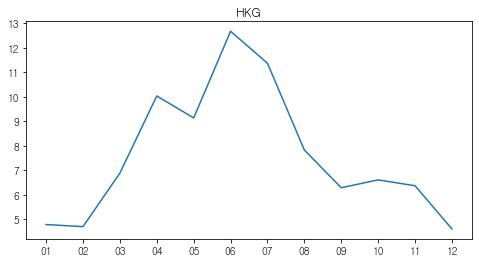

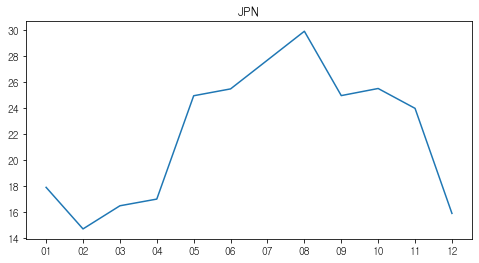

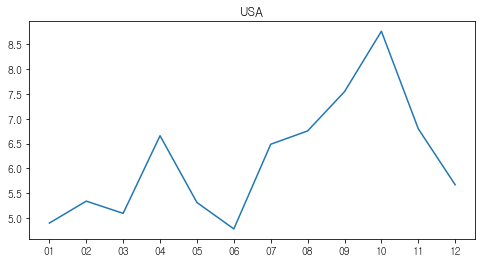

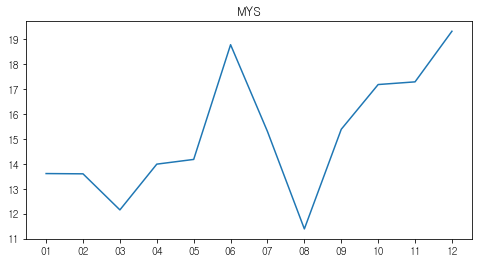

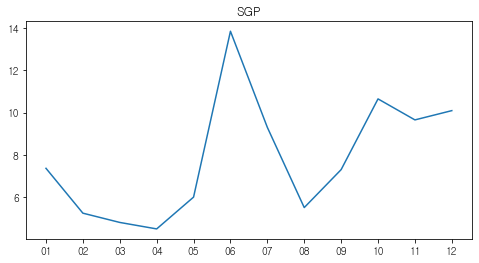

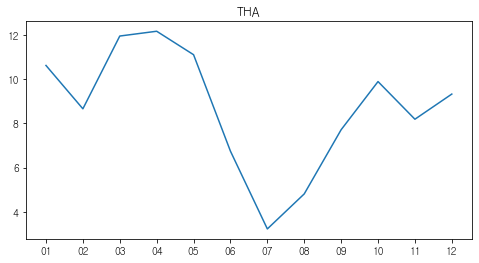

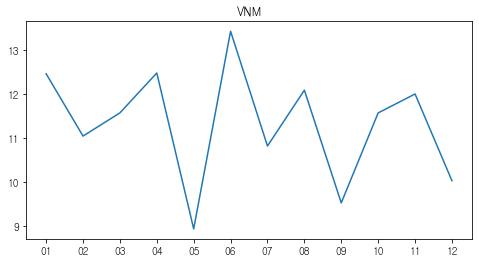

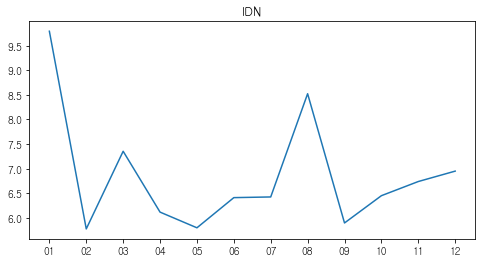

In [35]:
for nation in foreign['nationality'].unique():
    plt.figure(figsize=(8,4))
    nation_p=month.loc[(nation,),]
    plt.plot(nation_p.index,nation_p['visit_pop_cnt'])
    plt.title(nation)

- 중국은 전체 추이와 비슷
- 홍콩은 6월에 정점
- 일본은 8월에 정점
- 미국은 4월과 10월에 가장 많이 방문하고 8월에는 오히려 7월과 9월보다 낮음
- 말레이시아는 오히려 8월에 가장 적게 방문, 6월에 정점
- 싱가포르는 6월에 정점, 8월은 2월 다음 으로 낮다
- 태국은 7월에 가장 낮고, 4월,1월에 정점
- 베트남은 4월에 정점으로 9월에 가장 낮다
- 인도네시아는 9월에 가장 낮고 1월에 가장 높다

# 시간대별 추이

## 지역별 유동인구 추이

In [33]:
foreign

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66,2018,01
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21,2018,01
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3,2018,01
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5,2018,01
4,2018-01-01,1,USA,제주시,50110250,한림읍,3,2018,01
...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9,2021,06
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0,2021,06
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11,2021,06
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0,2021,06


In [75]:
time=pd.pivot_table(foreign,index=['time'],columns=['emd_nm'],values=['visit_pop_cnt']).reset_index()
time

time visit_pop_cnt                                              \
emd_nm                건입동        구좌읍        남원읍        노형동        대륜동   
0         1     29.167925  12.469144  25.429495  68.884880  16.611972   
1         2     29.248743  12.410630  25.418999  70.395802  16.865848   
2         3     29.282347  12.384279  25.351143  71.096536  16.913563   
3         4     29.168322  12.399293  25.464683  71.283317  16.959861   
4         5     28.963449  12.352951  25.614136  70.471171  16.960006   
5         6     28.660029  12.308158  26.240150  69.922468  16.943714   
6         7     28.623354  12.371453  26.799354  69.541132  16.965864   
7         8     28.844335  12.592562  27.162590  68.864045  17.249044   
8         9     28.129024  13.030632  27.545407  66.009767  16.816502   
9        10     25.827553  15.072078  27.082919  59.179101  16.093487   
10       11     22.630225  15.772238  26.216790  52.797055  14.711730   
11       12     20.701976  15.634494  26.028310  50.292180  13.552278   
12       13     19.658888  15.634444  26.053314  50.059618  12.800788   
13       14     19.098651  16.270572  26.054093  49.292126  12.747804   
14       15     19.051546  17.217782  26.499948  48.768279  12.788634   
15       16     19.491723  18.112694  26.517739  50.800000  12.617530   
16       17     20.454988  18.472486  26.097442  52.998018  12.462760   
17       18     21.207228  17.207326  25.806821  56.665493  12.819656   
18       19     22.673605  14.930977  25.226898  61.704407  13.459646   
19       20     24.937944  13.348602  24.979141  61.671078  14.295820   
20       21     26.883050  12.878641  25.104351  58.760631  14.952970   
21       22     28.001180  12.620588  25.247818  58.393447  15.570513   
22       23     28.743030  12.432392  25.214731  62.079340  15.986449   
23       24     28.841375  12.410291  25.046239  64.358892  16.079206   

                                                    ...                        \
emd_nm        대정읍        대천동        도두동        동홍동  ...        조천읍        중문동   
0       10.525866  10.695246  55.185369  14.178754  ...  20.601596  15.472158   
1       10.593858  10.726692  55.361102  14.304950  ...  20.823191  15.382109   
2       10.599351  10.782359  55.345439  14.362220  ...  20.853084  15.370023   
3       10.622768  10.751907  55.317089  14.341043  ...  20.788331  15.264220   
4       10.572525  10.719113  55.328304  14.335609  ...  20.786597  15.262815   
5       10.570849  10.751523  57.220162  14.355749  ...  20.670249  15.271272   
6       10.680251  10.679468  58.535424  14.295334  ...  20.776025  15.440098   
7       10.638199  10.470601  55.600532  14.149744  ...  20.735480  15.730639   
8       10.599514  10.262371  53.914820  13.913562  ...  20.683956  16.506417   
9       10.585720  10.123616  54.932570  12.934196  ...  22.420481  18.312168   
10      10.671033   9.833604  56.403658  12.257919  ...  24.114551  19.796725   
11      10.781751   9.567975  56.602080  11.774562  ...  23.758298  21.101377   
12      11.305158   9.466699  56.231798  11.488616  ...  22.586367  20.739033   
13      12.161301   9.523430  56.034072  11.308272  ...  22.165272  21.302558   
14      12.077822   9.643177  54.946777  11.247768  ...  22.645828  21.579184   
15      11.964666   9.741808  53.042199  11.148575  ...  23.018707  21.229528   
16      11.762612   9.762169  52.300067  11.276743  ...  22.439741  20.110253   
17      11.226804   9.661889  52.386063  11.635140  ...  20.882143  18.671838   
18      10.615483   9.557904  53.681951  12.104361  ...  19.300910  17.897643   
19      10.496955   9.809648  59.342917  12.568302  ...  18.776013  17.293498   
20      10.526552  10.189178  66.257289  13.126658  ...  19.492563  16.588143   
21      10.571031  10.429190  63.843030  13.616611  ...  19.827326  16.232493   
22      10.590463  10.611262  55.146373  13.939838  ...  20.149258  15.841212   
23      10.422380  10.571278  55.082546  13.944613  ...  20.190282  15.634717   

 

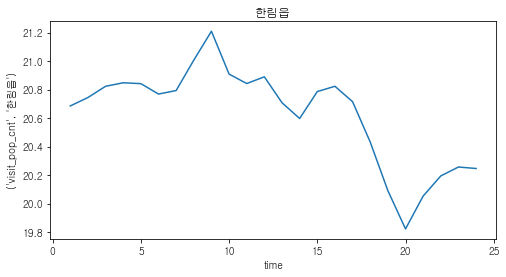

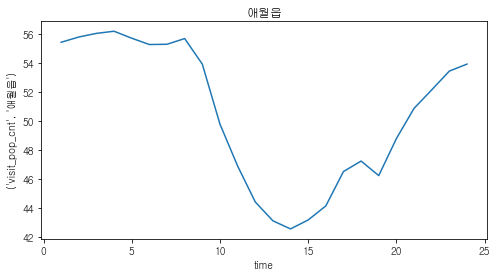

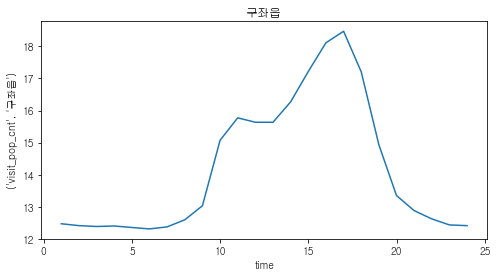

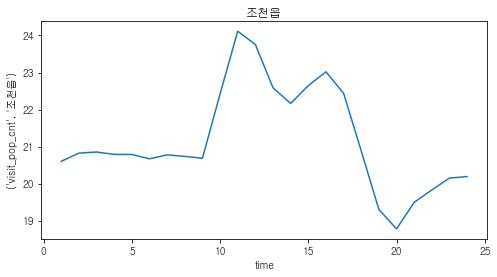

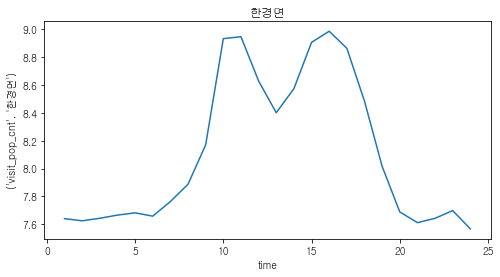

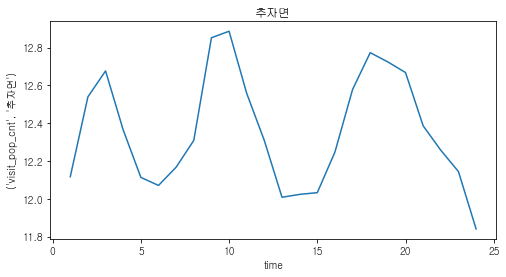

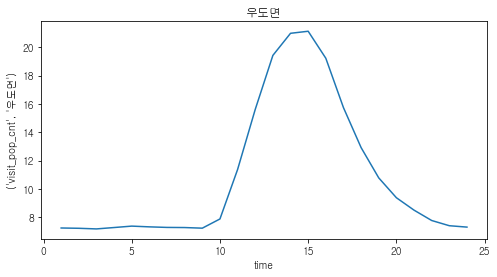

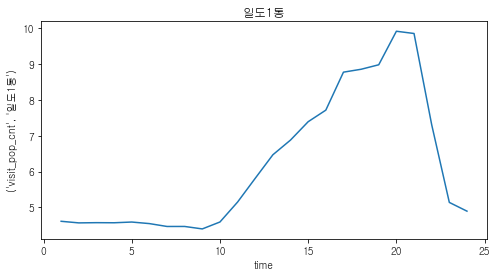

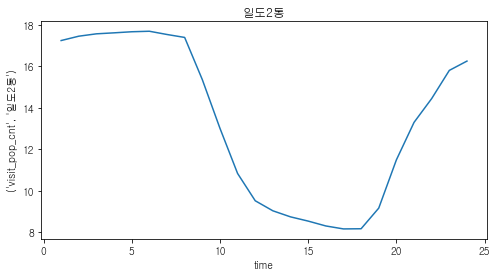

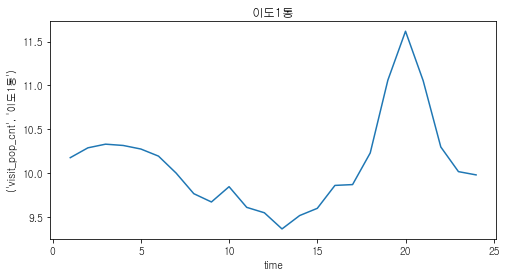

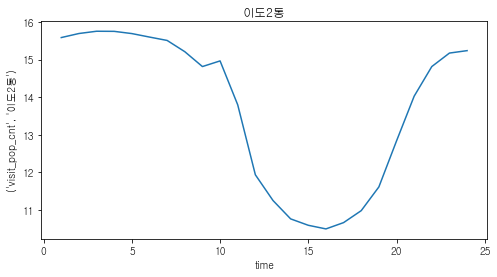

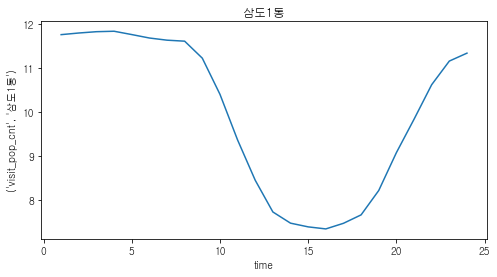

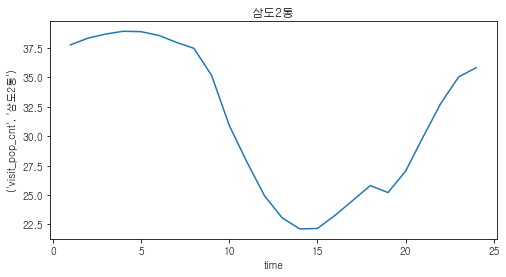

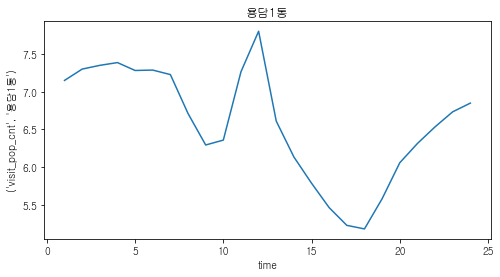

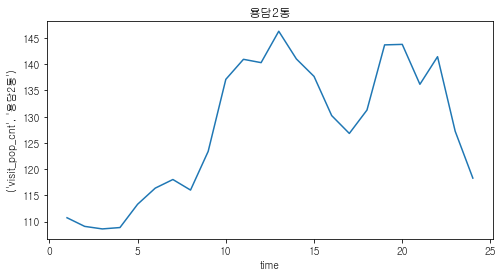

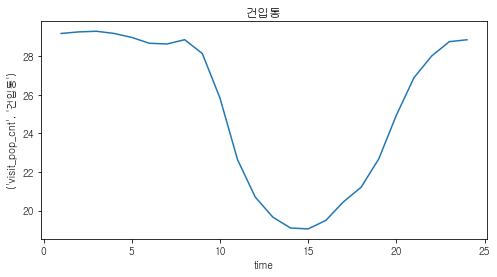

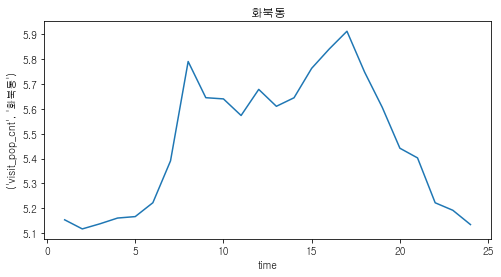

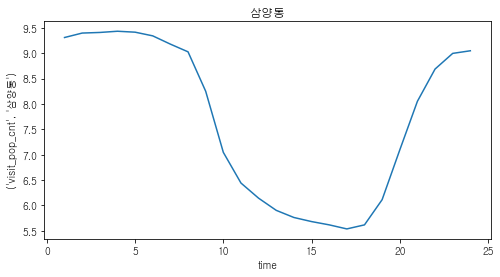

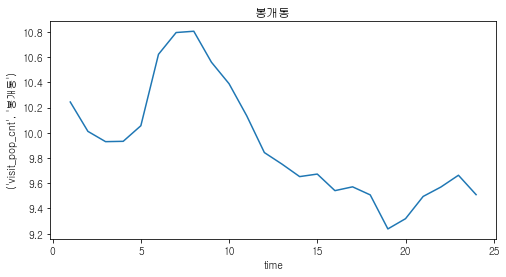

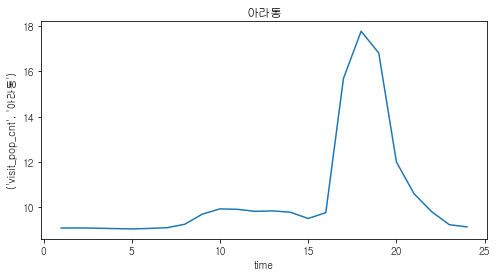

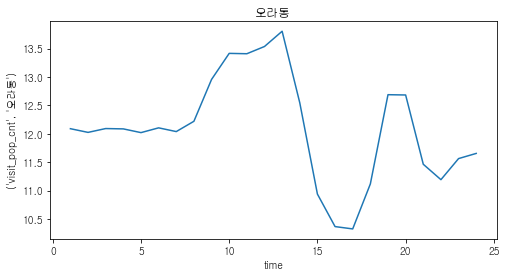

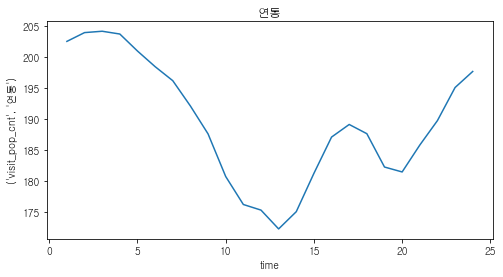

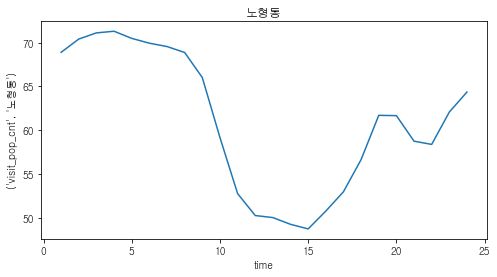

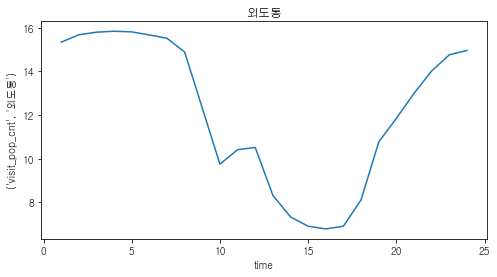

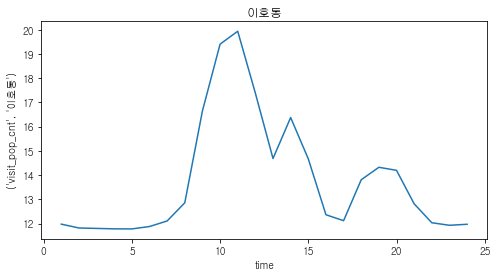

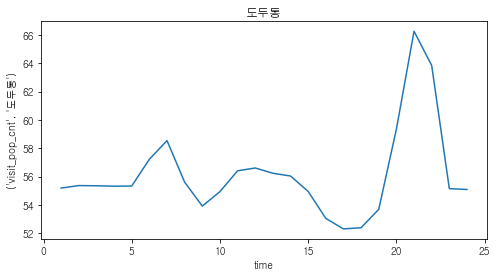

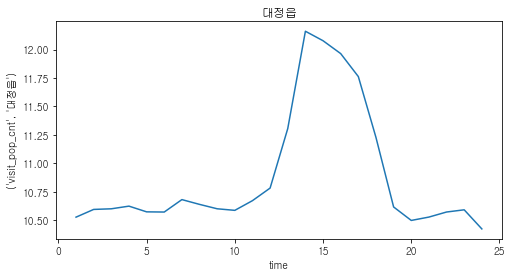

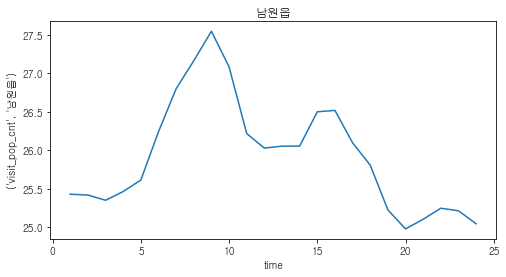

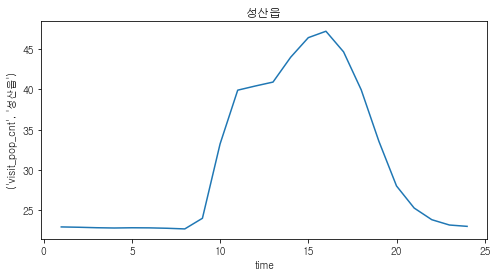

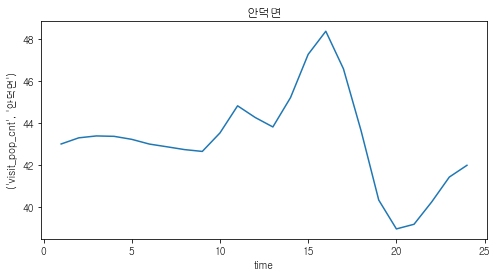

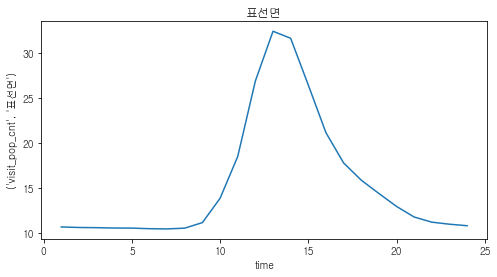

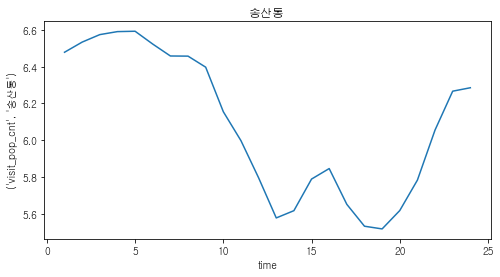

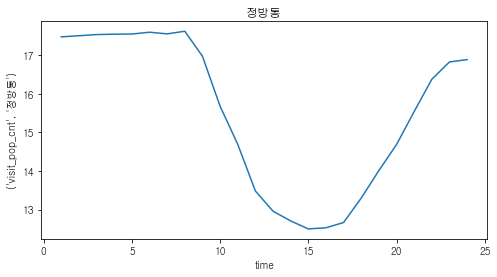

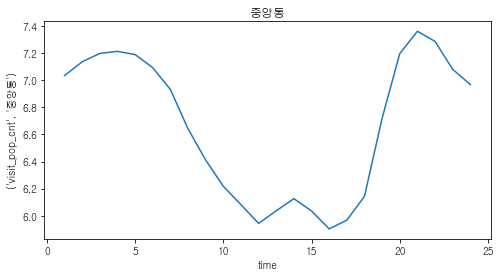

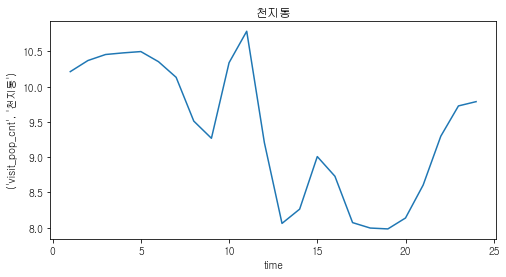

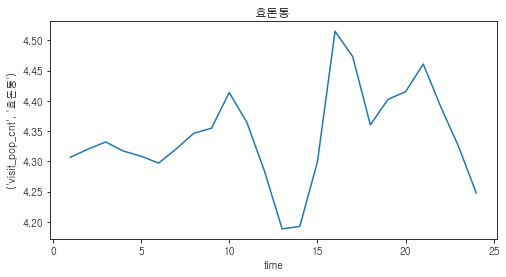

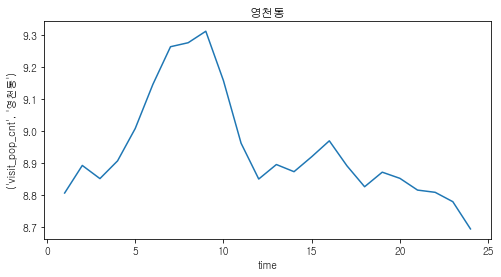

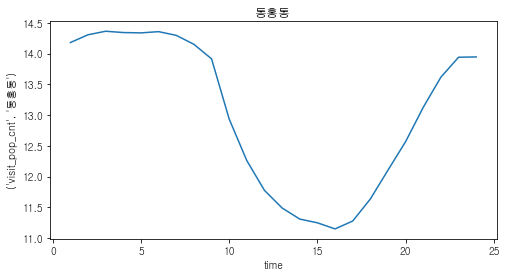

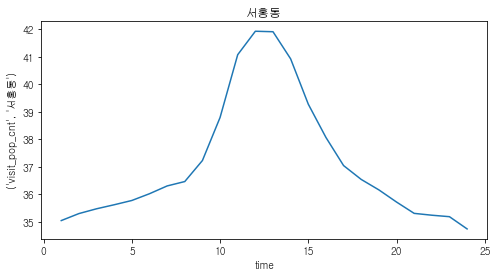

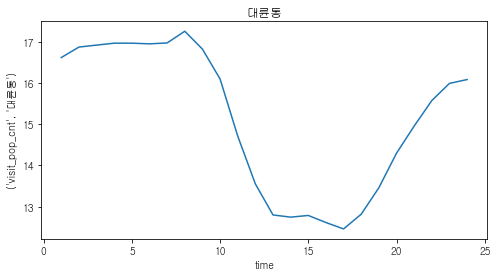

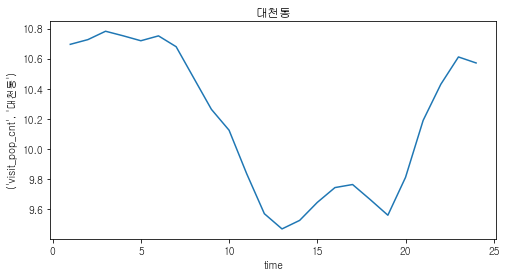

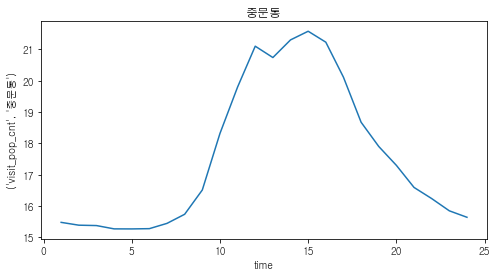

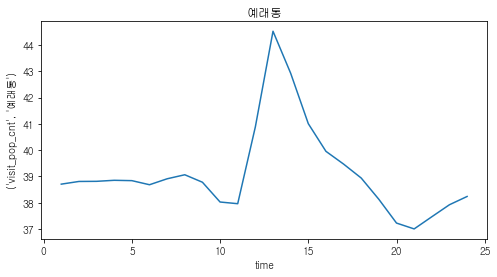

In [82]:
import seaborn as sns
for name in foreign.emd_nm.unique():
    plt.figure(figsize=(8,4))
    sns.lineplot(data=time,x='time',y=time.loc[:,('visit_pop_cnt',name)])
    plt.title(name)

## 시간대별 국적별

In [98]:
time_nation=pd.pivot_table(foreign,index=['time'],columns=['nationality'],values=['visit_pop_cnt']).reset_index()
time_nation

time visit_pop_cnt                                            \
nationality                CHN        ETC       HKG       IDN        JPN   
0              1    105.615071  22.520794  7.730195  7.046401  22.788044   
1              2    106.236108  22.635642  7.753505  7.058578  22.808633   
2              3    106.424307  22.685198  7.754196  7.076756  22.821079   
3              4    106.443115  22.718896  7.748532  7.077953  22.840553   
4              5    106.249883  22.695576  7.741023  7.069900  22.824279   
5              6    106.174426  22.723923  7.757557  7.095215  22.814016   
6              7    105.981182  22.790012  7.922428  7.150498  22.744401   
7              8    104.863287  22.749467  7.893431  7.182862  22.631138   
8              9    104.873043  22.757078  7.867982  7.166843  22.381405   
9             10    105.846736  22.841215  7.702739  7.008623  21.849159   
10            11    106.005015  22.765639  7.548341  6.838749  21.509873   
11            12    105.604764  22.733440  7.491649  6.679190  21.280408   
12            13    106.019684  22.813242  7.581299  6.569074  21.607361   
13            14    105.446536  22.749865  7.520398  6.481165  21.867853   
14            15    105.468912  22.776664  7.533868  6.357125  22.313900   
15            16    104.811182  22.747840  7.582174  6.358983  22.104724   
16            17    104.536774  22.700456  7.574500  6.351151  21.925091   
17            18    104.387443  22.609933  7.568014  6.544872  21.837860   
18            19    104.108115  22.497626  7.564825  6.615222  21.594342   
19            20    103.855928  22.424816  7.641285  6.659918  21.702440   
20            21    103.889517  22.417894  7.661911  6.814296  21.900475   
21            22    105.518979  22.522818  7.755435  6.942296  22.243800   
22            23    104.371854  22.418235  7.719551  7.041336  22.500275   
23            24    103.932524  22.205376  7.669017  6.999033  22.611746   

                                                                 
nationality        MYS       SGP       THA       USA        VNM  
0            15.547710  8.209269  8.372292  6.144157  11.661372  
1            15.560681  8.220518  8.368694  6.133800  11.678976  
2            15.595973  8.240002  8.378948  6.142212  11.714848  
3            15.598612  8.238413  8.377755  6.143353  11.712332  
4            15.646110  8.235171  8.393695  6.150966  11.684749  
5            15.697894  8.228027  8.409012  6.167000  11.684672  
6            15.680190  8.248528  8.459462  6.196201  11.737247  
7            15.726495  8.274480  8.482931  6.245674  11.737758  
8            15.599481  8.223012  8.339265  6.275912  11.685563  
9            15.239161  8.107768  9.029058  6.279508  11.532602  
10           14.952830  7.983184  9.330167  6.250551  11.414953  
11           14.764374  7.952748  9.405964  6.235568  11.153339  
12           14.742733  8.028069  9.484948  6.267481  11.158459  
13           14.750986  7.984042  9.448886  6.252772  11.016052  
14           14.804540  7.999487  9.384789  6.259841  10.859029  
15           14.621506  8.011779  9.235196  6.251613  10.769544  
16           14.494189  7.954545  8.986601  6.261246  10.873462  
17           14.580797  7.938612  8.934602  6.206822  11.007967  
18           14.658595  7.801517  9.193813  6.143936  11.078413  
19           14.850059  7.832048  9.335858  6.149313  11.164142  
20           15.056720  7.944354  9.293595  6.153972  11.361778  
21           15.341036  8.131709  8.569462  6.194037  11.500894  
22           15.487657  8.194191  8.358928  6.182346  11.627024  
23           15.474227  8.175727  8.332181  6.129814  11.600816

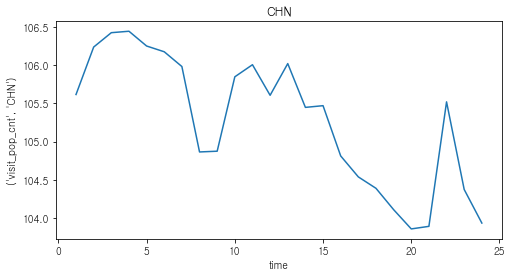

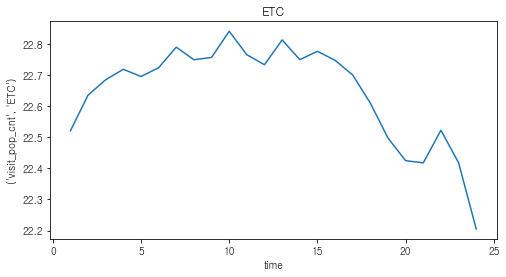

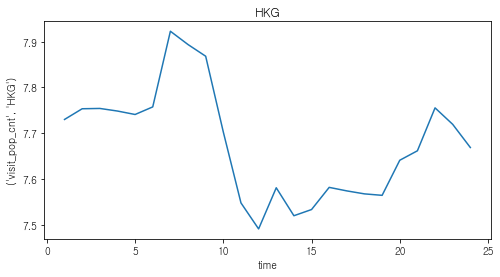

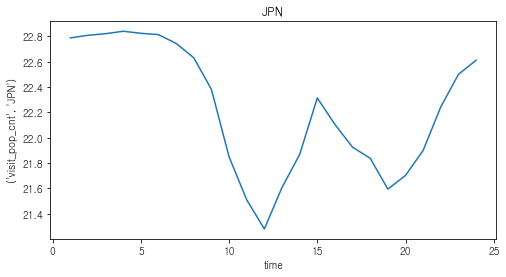

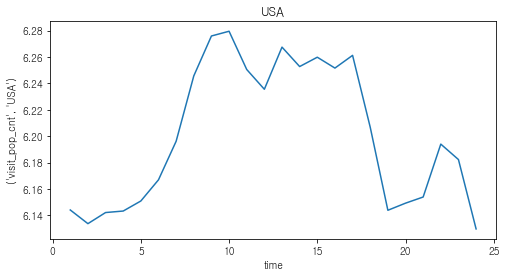

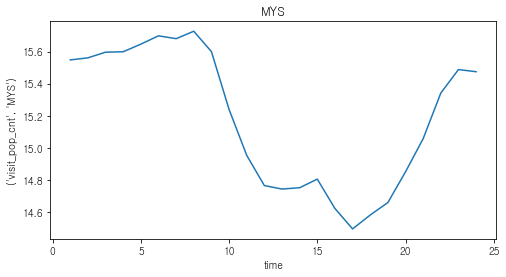

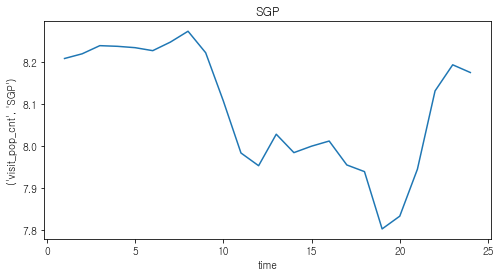

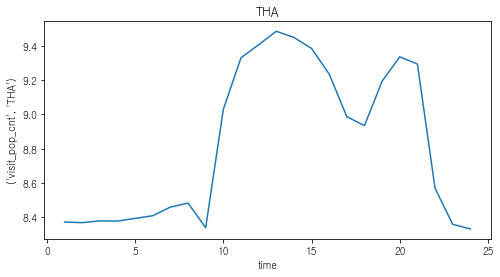

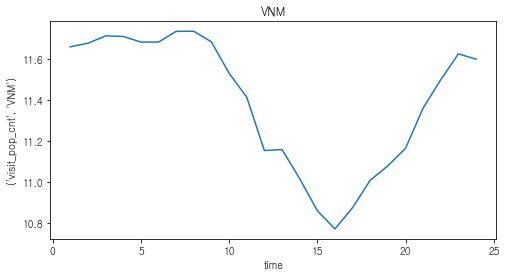

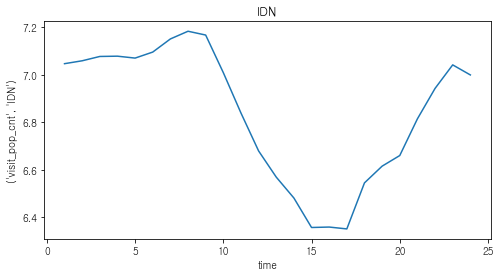

In [100]:

    for nation in foreign.nationality.unique():  
        plt.figure(figsize=(8,4))
        sns.lineplot(data=time_nation,x='time',y=time_nation.loc[:,('visit_pop_cnt',nation)])
        plt.title(nation)